In [1]:
import math

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/7/Bank_Personal_Loan_Modelling_train.csv')
df_orig = df.copy()
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4588,37,11,59,94720,4,0.2,3,0,0,0,0,0,0
3996,2342,36,10,91,92028,1,1.5,3,289,0,0,0,1,0
3997,1586,57,31,131,90502,2,2.7,1,0,0,0,0,0,0
3998,3153,40,15,83,90275,1,1.0,3,0,0,0,0,0,0


In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

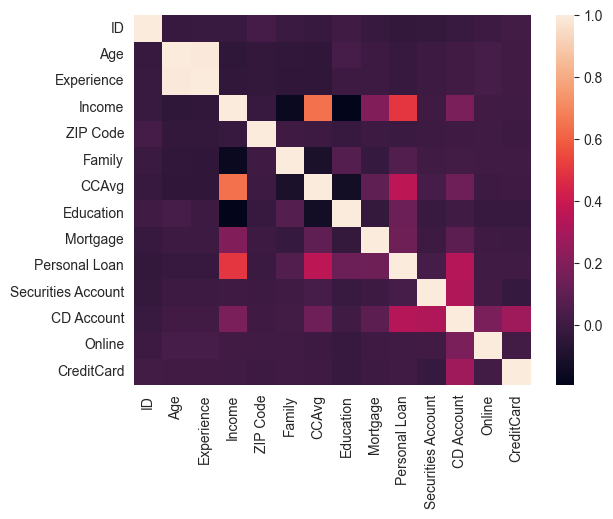

In [4]:
sns.heatmap(df.corr())

In [5]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [6]:
df['Experience'] -= df['Experience'].min()
df['Experience'].min()

0

In [7]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,2.8,1,0,0,0,0,1,0
1,44,22,30,1,0.5,3,0,0,0,0,1,0
2,26,3,19,1,0.1,2,121,0,0,0,1,0
3,34,12,41,2,0.1,1,161,0,0,0,1,1
4,56,35,51,4,1.5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,0.2,3,0,0,0,0,0,0
3996,36,13,91,1,1.5,3,289,0,0,0,1,0
3997,57,34,131,2,2.7,1,0,0,0,0,0,0
3998,40,18,83,1,1.0,3,0,0,0,0,0,0


In [8]:
np.round(df['Experience'].mean(), 3)

23.196

In [9]:
df['CCAvg'] *= 12

In [10]:
np.round(df['CCAvg'].mean(), 3)

23.062

<Axes: xlabel='Mortgage', ylabel='Count'>

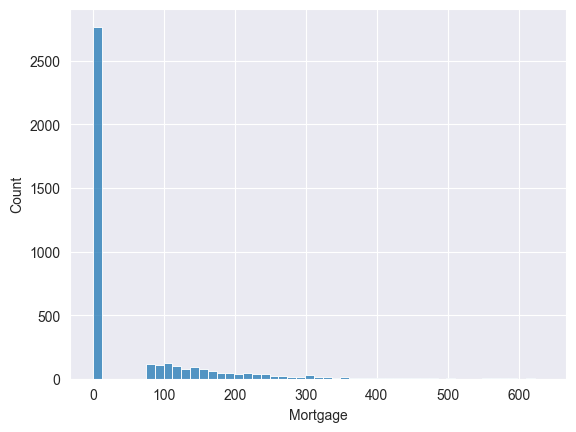

In [11]:
sns.histplot(df['Mortgage'])

In [12]:
from scipy.stats import zscore

(zscore(df['Mortgage']) >= 3).sum()

83

In [13]:
zscore(df['Mortgage']) >= 3

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: Mortgage, Length: 4000, dtype: bool

In [14]:
df_fixed = df[zscore(df['Mortgage']) <= 3]
df_fixed

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


In [15]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


In [16]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]


def get_f1_score(dataset, criterion: str, label: str = 'Personal Loan'):
    X, Y = split_dataset(dataset, label)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=dataset[label])

    classifier = DecisionTreeClassifier(random_state=7, criterion=criterion)
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_test)

    return np.round(f1_score(Y_test, Y_predicted), 3)

In [17]:
get_f1_score(df, 'gini')

0.886

In [18]:
get_f1_score(df, 'entropy')

0.884

In [53]:
def get_f1_score(dataset, criterion: str, label: str = 'Personal Loan'):
    X, Y = split_dataset(dataset, label)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=dataset[label])

    classifier = DecisionTreeClassifier(random_state=7, criterion=criterion, class_weight='balanced')
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_test)

    return np.round(f1_score(Y_test, Y_predicted), 3)

In [54]:
get_f1_score(df, 'gini')

0.868

In [55]:
get_f1_score(df, 'entropy')

0.865

# Upsampling

In [39]:
1 - (df['Personal Loan'].sum() / df['Personal Loan'].count())

0.911

In [40]:
df['Personal Loan'].count() - df['Personal Loan'].sum()

3569

In [47]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(random_state=7)
X, Y = split_dataset(df, 'Personal Loan')
X, Y = sampler.fit_resample(X.to_numpy(), Y.to_numpy())
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.600000,1,0,0,0,1,0
1,44,22,30,1,6.000000,3,0,0,0,1,0
2,26,3,19,1,1.200000,2,121,0,0,1,0
3,34,12,41,2,1.200000,1,161,0,0,1,1
4,56,35,51,4,18.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7133,59,37,123,2,6.078090,2,0,0,0,1,0
7134,55,33,106,2,45.631732,3,0,0,0,0,0
7135,55,34,173,1,53.933151,2,89,0,0,0,0
7136,61,36,165,2,91.780210,2,353,0,0,1,0


In [42]:
df_upsampled = pd.DataFrame(X, columns=df.columns.drop('Personal Loan'))
df_upsampled['Personal Loan'] = Y
df_upsampled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,60.000000,39.000000,89.000000,2.000000,33.600000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0
1,44.000000,22.000000,30.000000,1.000000,6.000000,3.000000,0.000000,0.0,0.000000,1.000000,0.000000,0
2,26.000000,3.000000,19.000000,1.000000,1.200000,2.000000,121.000000,0.0,0.000000,1.000000,0.000000,0
3,34.000000,12.000000,41.000000,2.000000,1.200000,1.000000,161.000000,0.0,0.000000,1.000000,1.000000,0
4,56.000000,35.000000,51.000000,4.000000,18.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7133,59.532537,37.532537,123.149403,2.850597,6.078090,2.383134,0.000000,0.0,0.616866,1.000000,0.000000,1
7134,55.506611,33.519833,106.947113,2.506611,45.631732,3.000000,0.000000,0.0,0.000000,0.000000,0.493389,1
7135,55.419361,34.366575,173.950137,1.105571,53.933151,2.052785,89.847489,0.0,0.947215,0.947215,0.000000,1
7136,61.741754,36.225262,165.497188,2.629123,91.780210,2.629123,353.596139,0.0,0.629123,1.000000,0.629123,1


In [56]:
df_upsampled['Personal Loan'].sum()

In [57]:
def get_f1_score(dataset, criterion: str, label: str = 'Personal Loan'):
    X, Y = split_dataset(dataset, label)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=dataset[label])

    classifier = DecisionTreeClassifier(random_state=7, criterion=criterion)
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_test)

    return np.round(f1_score(Y_test, Y_predicted), 3)

2855

In [76]:
get_f1_score(df_upsampled, 'gini')

In [77]:
get_f1_score(df_upsampled, 'entropy')

0.972183588317107

0.9741439552760307